In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
%matplotlib notebook

In [3]:
df = df.transpose()

In [4]:
yerrs = []
for year in list(df.columns):
    interval = st.t.interval(0.95, len(df[year])-1, loc=np.mean(df[year]), scale=st.sem(df[year]))
    yerror = (interval[1] - interval[0])/2
    yerrs.append(yerror)
yerrs

[6510.938018014029, 3193.2548443775886, 4555.329591601978, 2264.561290894686]

In [5]:
#swithc rows-columns
df = df.describe()
df

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


<IPython.core.display.Javascript object>


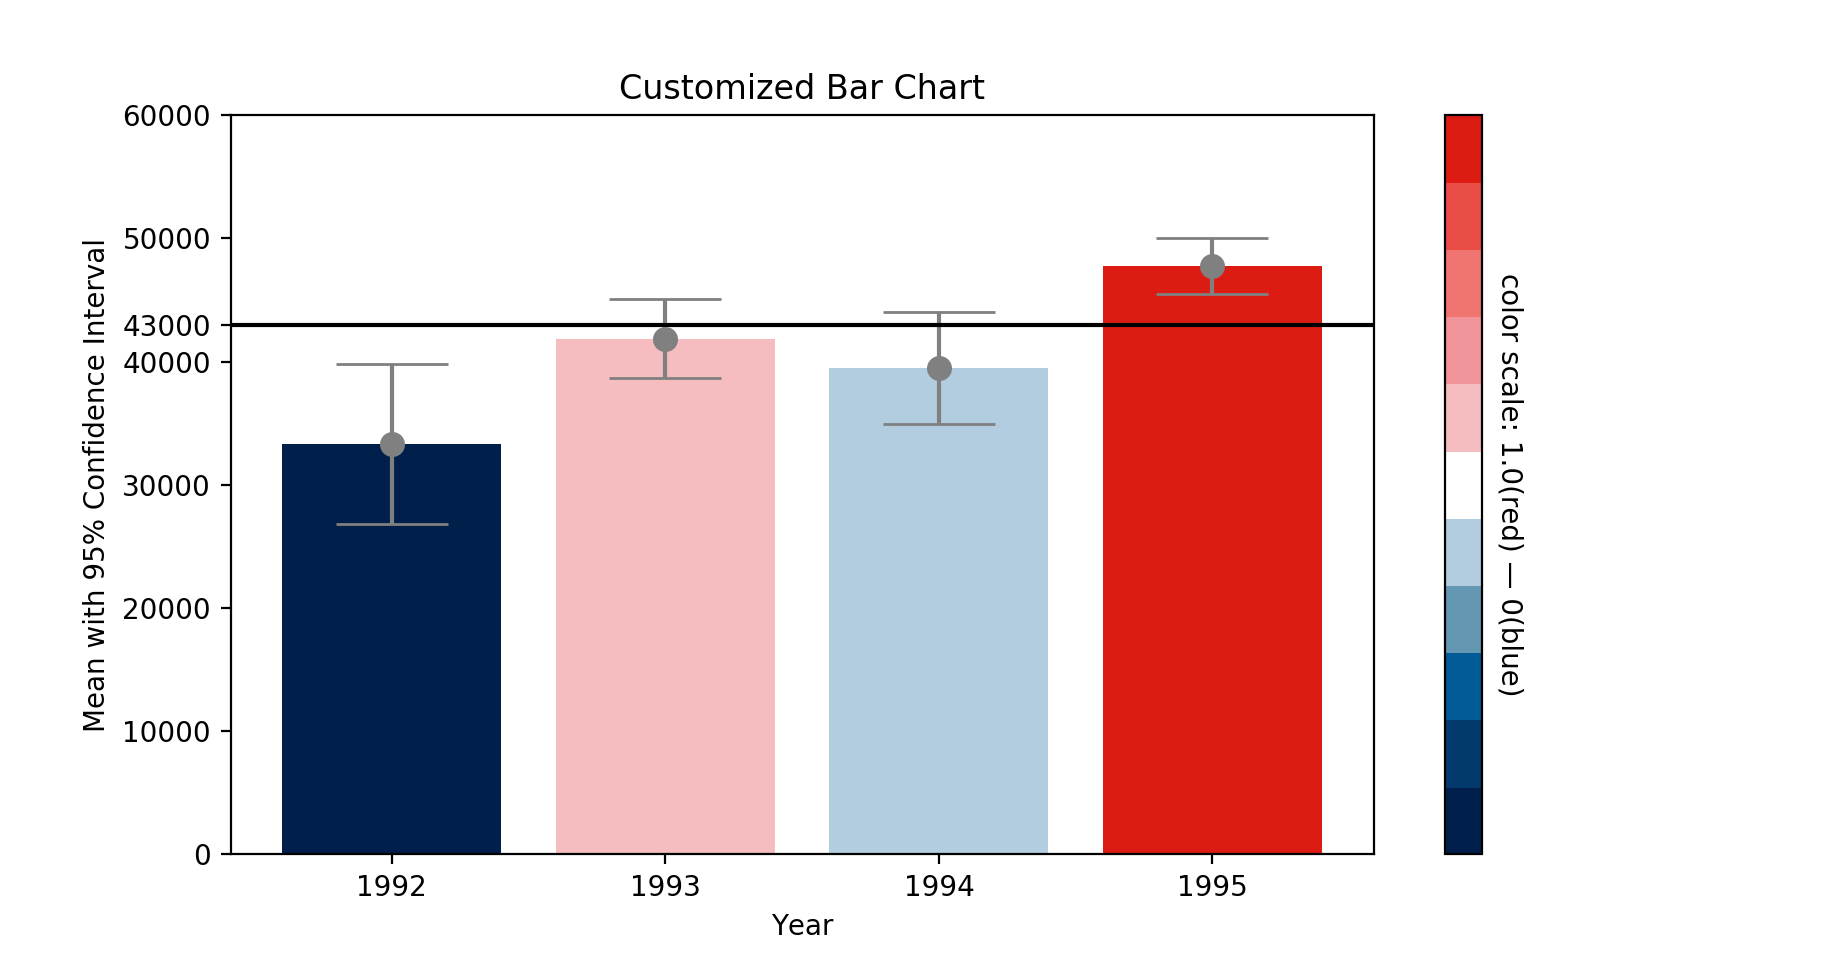

Text(0, 0.5, 'color scale: 1.0(red) — 0(blue)')

In [6]:
#side colorbar
fig, ax = plt.subplots()

cMap = ListedColormap(['#011f4b', '#03396c', '#005b96', '#6497b1', '#b3cde0','white', '#F6bDC0', '#F1959B', '#F07470', '#EA4c46', '#DC1C13'])

heatmap = ax.pcolor(df, cmap=cMap)
cbar = plt.colorbar(heatmap)

cbar.ax.get_yaxis().set_ticks([])

cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('color scale: 1.0(red) — 0(blue)', rotation=270)


In [7]:

xvals = [str(year) for year in df.columns]
plt.bar(xvals, df.iloc[df.index.get_loc('mean')], color=['#011f4b', '#F6bDC0', '#b3cde0', '#DC1C13'])


<BarContainer object of 4 artists>

In [8]:
#plot confidence interval
plt.errorbar(xvals, df.iloc[df.index.get_loc('mean')], yerr=yerrs, fmt='o', markersize=8, capsize=20, color='gray')

<ErrorbarContainer object of 3 artists>

In [9]:
# plot constant line & bar chart
plt.axhline(y=43000, color='k', linestyle='-')
y_ticks = np.append(ax.get_yticks(), 43000)
ax.set_yticks(y_ticks)

In [10]:
plt.xlabel('Year')
plt.ylabel('Mean with 95% Confidence Interval')
plt.title('Customized Bar Chart')


Text(0.5, 1.0, 'Customized Bar Chart')